In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/Unsupervised Learning Mahesh Anand/winequality-red.csv")

In [0]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
df.iloc[393,]

fixed_acidity            8.400
volatile_acidity         0.665
citric_acid              0.610
residual_sugar           2.000
chlorides                0.112
free_sulfur_dioxide     13.000
total_sulfur_dioxide    95.000
density                  0.997
pH                       3.160
sulphates                0.540
alcohol                  9.100
quality                  5.000
Name: 393, dtype: float64

In [0]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [0]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
df_rows , df_cols = df.shape
print(df_rows)
print(df_cols)

1599
12


In [0]:
df2 = df.loc[:, 'fixed_acidity':'alcohol']

In [0]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


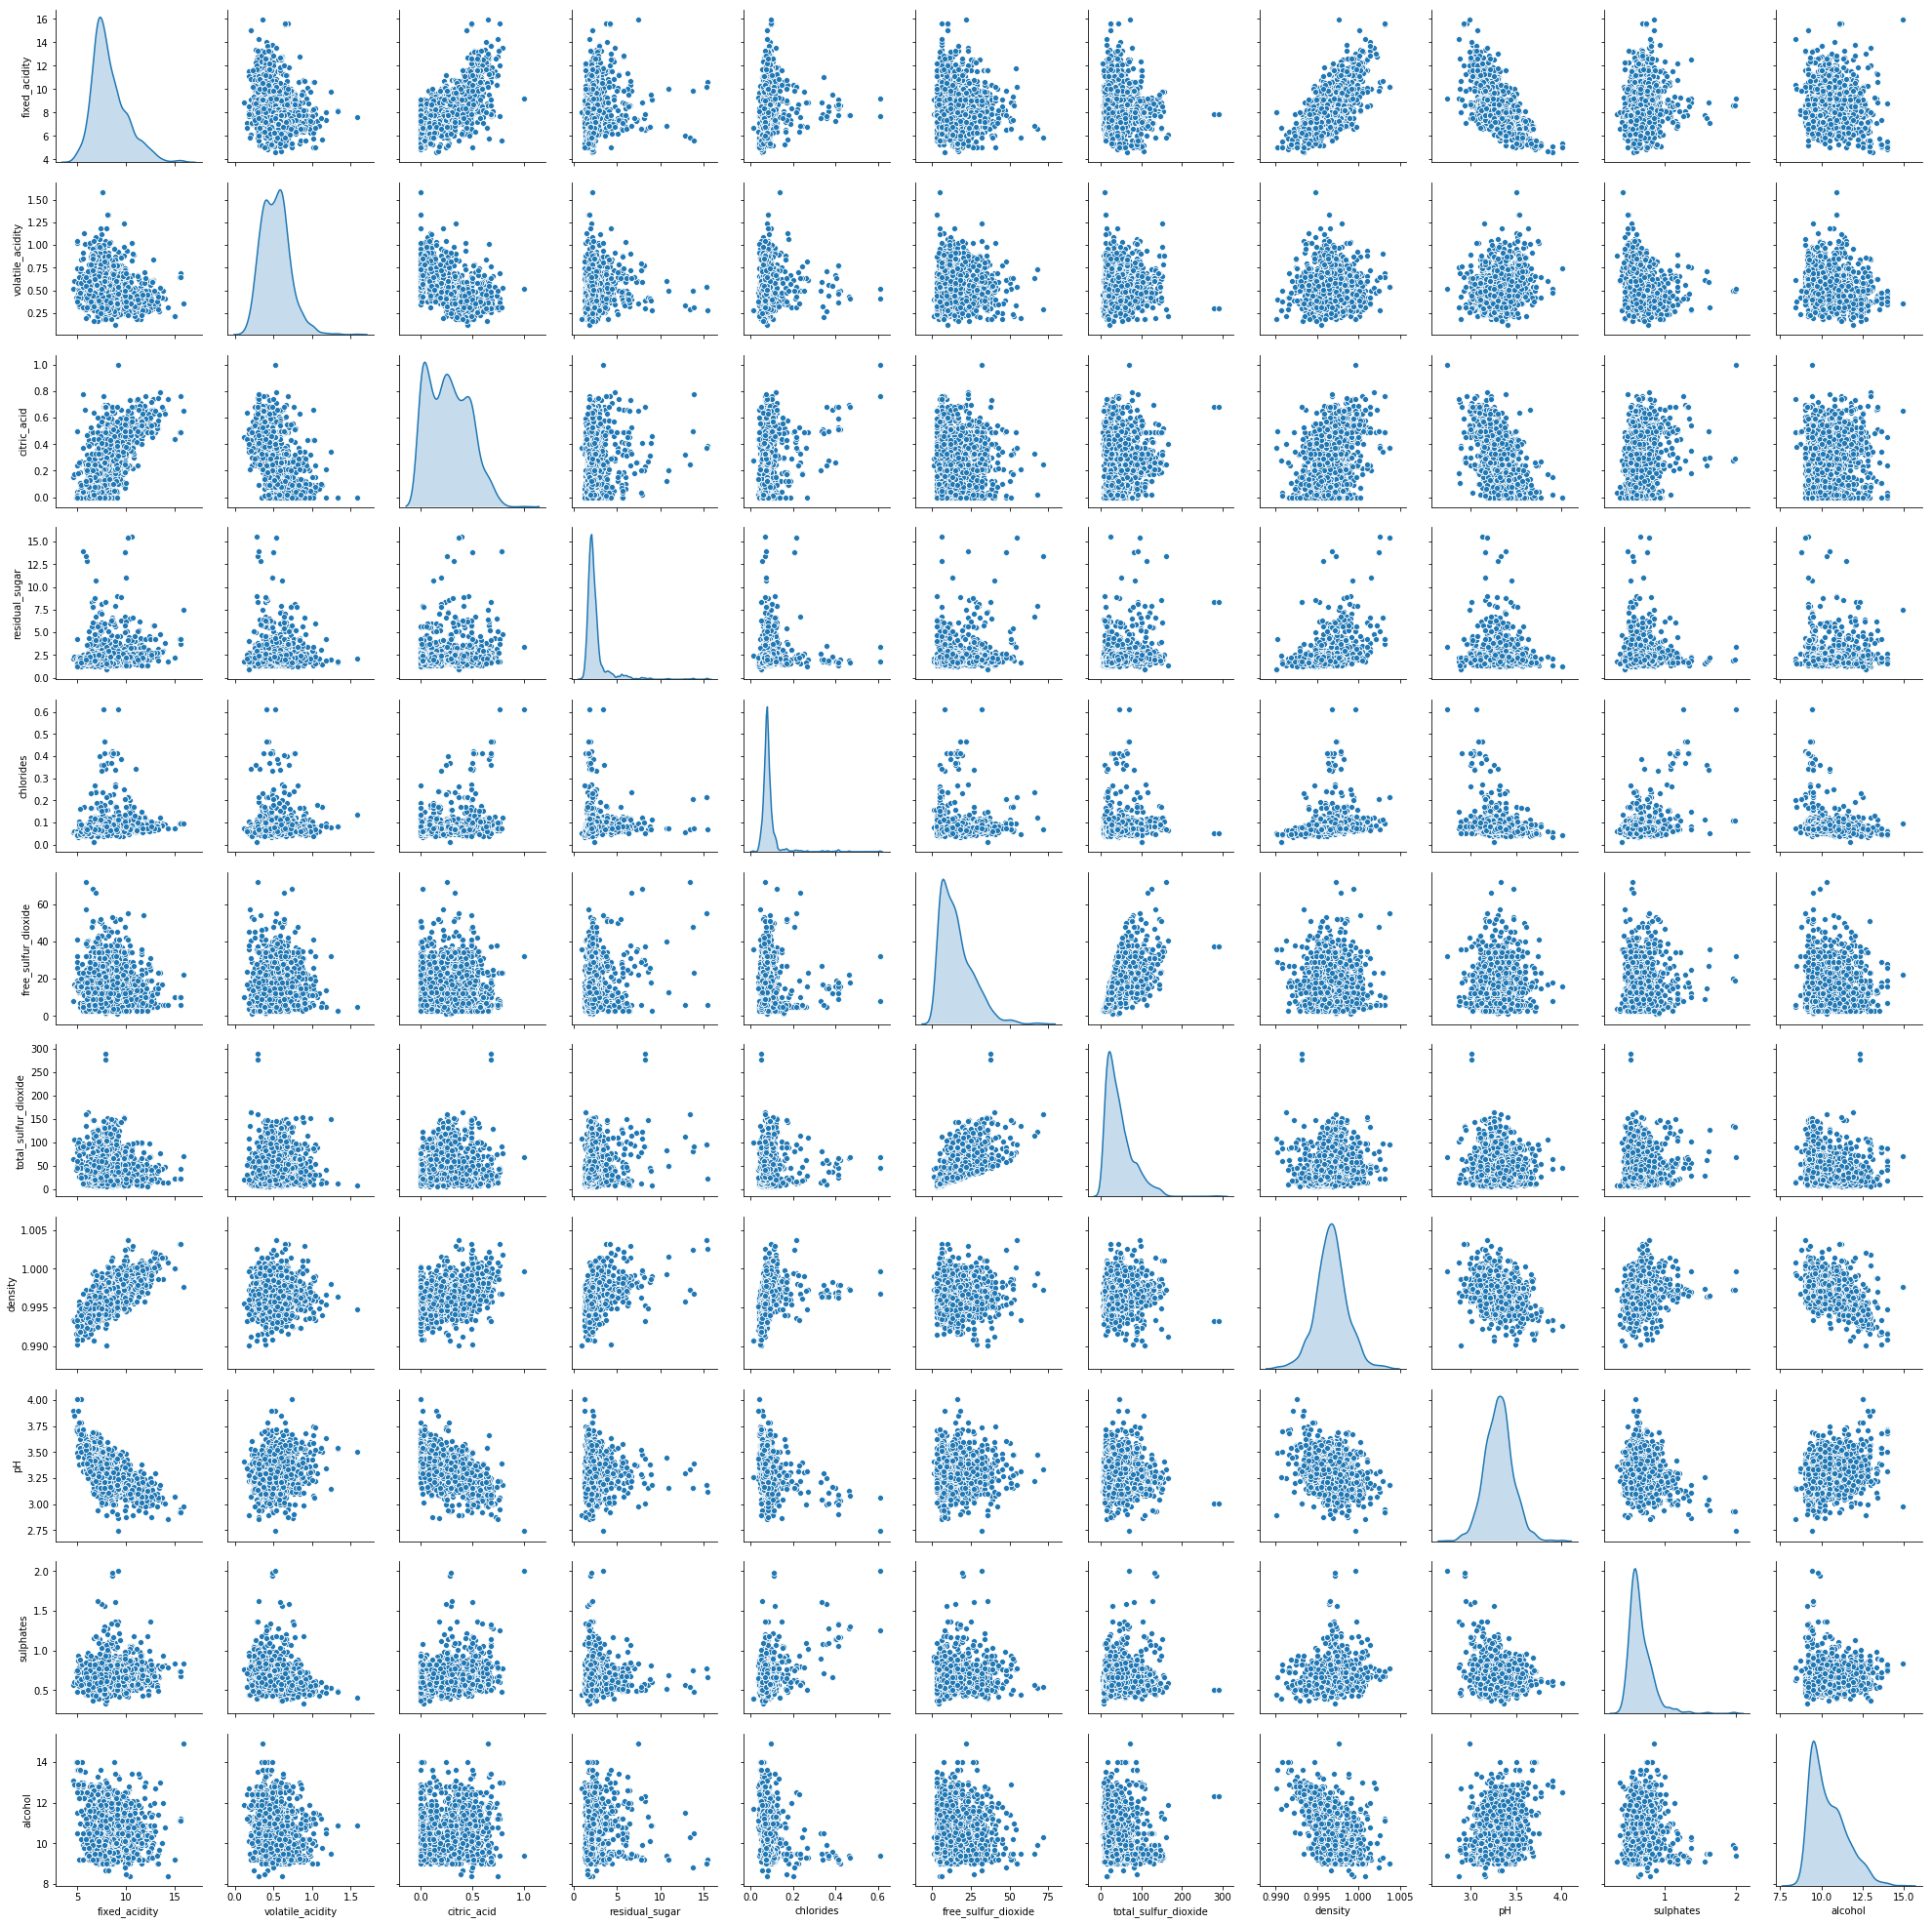

In [0]:
#For a complete EDA, visit this page: https://rstudio-pubs-static.s3.amazonaws.com/142451_096eafe187b34ade916fcbe10bb432b2.html

import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [0]:
df_scaled = df2.apply(zscore)


In [0]:
df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [0]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10,random_state=2 )
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,17589.000000
1,2,14330.119811
2,3,12629.925638
3,4,11459.054180
4,5,10155.374026
5,6,9362.004259
6,7,8645.651873
7,8,8299.467496
8,9,7968.119858
9,10,7702.327060


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

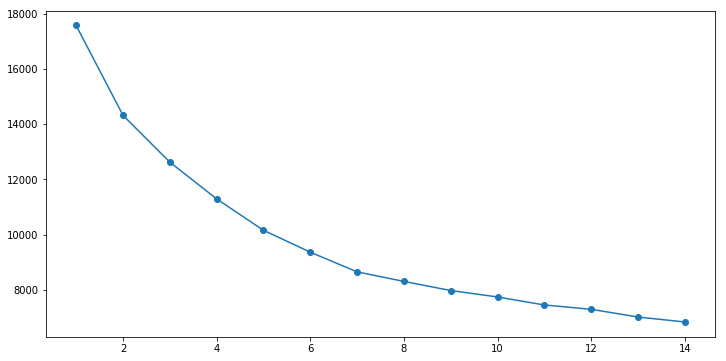

In [0]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
kmeans = KMeans(n_clusters=6, n_init = 10, random_state=2)

In [0]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [0]:
centroids = kmeans.cluster_centers_

In [0]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [0]:
centroid_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.483087,0.686745,-0.829218,-0.190658,-0.061036,-0.418915,-0.412166,-0.061315,0.427495,-0.391981,-0.414155
1,-0.082430,0.037266,0.066045,-0.021447,-0.035494,1.001073,1.209117,0.223226,-0.124744,-0.173835,-0.567086
2,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913
3,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731
4,1.351835,-0.672052,1.127972,0.074370,-0.010210,-0.566327,-0.537327,0.782495,-0.852929,0.336232,0.163474
5,-0.675355,-0.451932,-0.117500,-0.252951,-0.413452,0.084404,-0.248242,-1.248434,0.610811,0.152437,1.316165


kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [0]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [0]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
wine_df_labeled = df_scaled.join(df_labels)

In [0]:
df_G=wine_df_labeled.groupby('labels')

In [0]:
df0=df_G.get_group(0)
df1=df_G.get_group(1)
df2=df_G.get_group(2)
df3=df_G.get_group(3)
df4=df_G.get_group(4)
df5=df_G.get_group(5)

In [0]:
(df0.shape,df1.shape,df2.shape,df3.shape,df4.shape,df5.shape)

((533, 12), (344, 12), (34, 12), (28, 12), (361, 12), (299, 12))

In [0]:
np.sum(np.sum((df0.iloc[:,:-1]-centroid_df.iloc[0,:])**2,axis=1))

2268.1290388966495

In [0]:
np.sum(np.sum((df1.iloc[:,:-1]-centroid_df.iloc[1,:])**2,axis=1))

1920.8123309183904

In [0]:
np.sum(np.sum((df2.iloc[:,:-1]-centroid_df.iloc[2,:])**2,axis=1))

628.1439934706186

In [0]:
np.sum(np.sum((df3.iloc[:,:-1]-centroid_df.iloc[3,:])**2,axis=1))

428.32123086368176

In [0]:
np.sum(np.sum((df4.iloc[:,:-1]-centroid_df.iloc[4,:])**2,axis=1))

2175.776579207104

In [0]:
np.sum(np.sum((df5.iloc[:,:-1]-centroid_df.iloc[5,:])**2,axis=1))

1940.8210855161174

In [0]:
#Total Inertial at 6-cluster levels
2268.1290+1920.8123+628.1439+428.3212+2175.7765+1940.8210

9362.0039

In [0]:
df_analysis = (wine_df_labeled.groupby(['labels'] , axis=0)).head(1599)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(1599) for that
df_analysis

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,labels
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,4
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,1


In [0]:
wine_df_labeled['labels'].value_counts()

0    533
4    361
1    344
5    299
2     34
3     28
Name: labels, dtype: int64

In [0]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

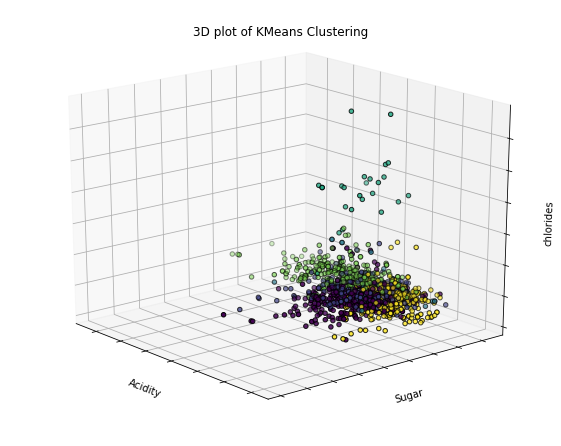

In [0]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=140)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 4],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('chlorides')
ax.set_title('3D plot of KMeans Clustering')